## Project - Part II


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gaussian_process import (
    optimize_kernel_params,
    plot_grid_search_results,
    predict_conditional_mean_and_var
)


### Data Loading


In [2]:
# Time steps in the simulation
n_steps = 100

# Speed flow: 3D array with shape (Time, X coordinates, Y coordinates, 2)
speed_flow = []

# Load the X and Y data for each time step
for i in range(n_steps):

    # Load the data for X and Y
    # The data is given in a matrix with data for each position in the grid
    Vx = pd.read_csv(f'./OceanFlow/{i+1}u.csv', header=None).values
    Vy = pd.read_csv(f'./OceanFlow/{i+1}v.csv', header=None).values

    # Construct the total velocity by concatenating the X and Y components as
    # columns in a single array
    V = np.stack([Vx, Vy], axis=2)

    # Add the current time step velocity to the speed_flow array
    speed_flow.append(V)

# Convert the speed_flow list to a numpy array
Vt = np.array(speed_flow)
print("Data Shape:", Vt.shape)
print("- Timesteps:", Vt.shape[0])
print("- Y coordinates:", Vt.shape[1])
print("- X coordinates:", Vt.shape[2])
print("- Velocity components:", Vt.shape[3])

# Get the X and Y velocities
Vx = Vt[:, :, :, 0]
Vy = Vt[:, :, :, 1]

# Load the mask data
mask = pd.read_csv('./OceanFlow/mask.csv', header=None).values

# The mask is flipped in the Y axis, so we flip it back
mask = np.flip(mask, axis=0)

Data Shape: (100, 504, 555, 2)
- Timesteps: 100
- Y coordinates: 504
- X coordinates: 555
- Velocity components: 2


### Part II

#### Problem 4.a (10 points)

Take into consideration that now measurements are considered to have 3 days between them, instead of the 3 hours used in the previous part.


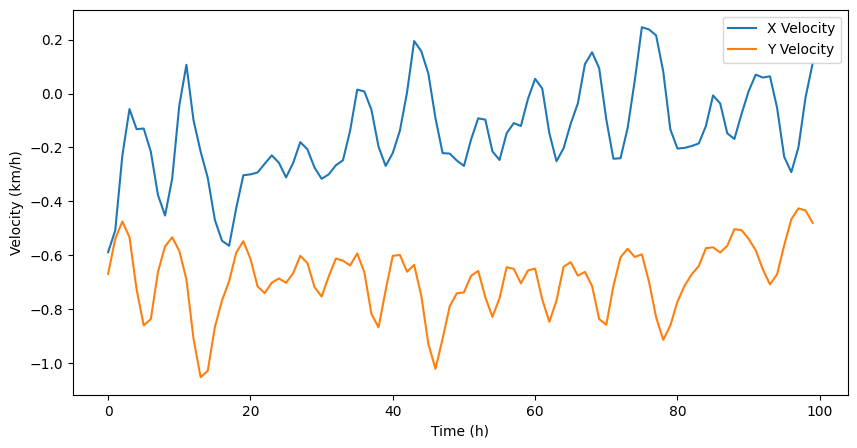

In [3]:
# Select a specific location to get the velocity data
x = 400
y = 200

# Get the velocity data for the selected location (Vl = Location Velocity)
V_loc = Vt[:, y, x, :]

# Get the X and Y velocity components
Vx_loc = V_loc[:, 0]
Vy_loc = V_loc[:, 1]

# ==================== PLOT ==================== #

# Plot the X and Y velocity components
plt.figure(figsize=(10, 5))
plt.plot(Vx_loc, label='X Velocity')
plt.plot(Vy_loc, label='Y Velocity')
plt.legend()
plt.xlabel('Time (h)')
plt.ylabel('Velocity (km/h)')
plt.show()


100%|██████████| 100/100 [00:05<00:00, 16.75it/s]



Vx - Optimal 'l':  5.0
Vx - Optimal 'sigma':  0.01
Vy - Optimal 'l':  5.0
Vy - Optimal 'sigma':  0.01


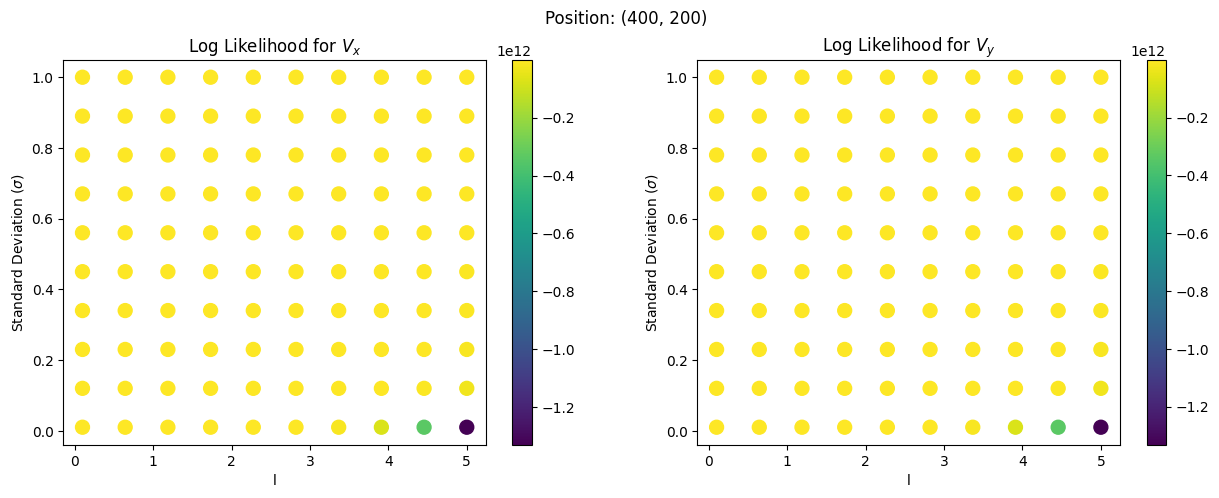

In [4]:
# ================ OPTIMIZATION ================ #

# Create a range of values for "l" and "sigma"
l_range = np.linspace(0.1, 5, 10)
std_range = np.linspace(0.01, 1, 10)

# Folds to use for cross validation
num_folds = 15

# Optimize the kernel parameters for the X component
l_x, std_x, x_results_df = optimize_kernel_params(
    data=Vx_loc,
    l_range=l_range,
    std_range=std_range,
    num_folds=num_folds
)

# Optimize the kernel parameters for the Y component
l_y, std_y, y_results_df = optimize_kernel_params(
    data=Vy_loc,
    l_range=l_range,
    std_range=std_range,
    num_folds=num_folds
)

# Label the parameters for each axis as "optimal"
optimal_l_x = l_x
optimal_std_x = std_x
optimal_l_y = l_y
optimal_std_y = std_y

# =================== RESULTS ================== #

print()
print("Vx - Optimal 'l': ", l_x)
print("Vx - Optimal 'sigma': ", std_x)
print("Vy - Optimal 'l': ", l_y)
print("Vy - Optimal 'sigma': ", std_y)

# ==================== PLOT ==================== #

# Plot the results of the grid search
plot_grid_search_results(
    x_results_df=x_results_df,
    y_results_df=y_results_df,
    position=np.array([x, y])
)


#### Problem 4.b (5 points)


100%|██████████| 100/100 [00:05<00:00, 17.25it/s]


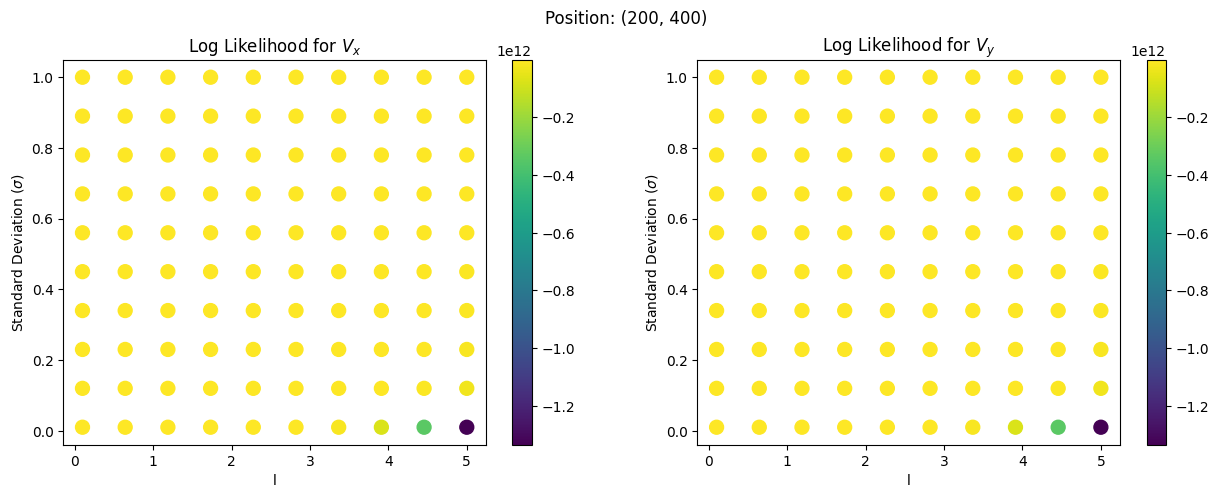

100%|██████████| 100/100 [00:05<00:00, 17.30it/s]


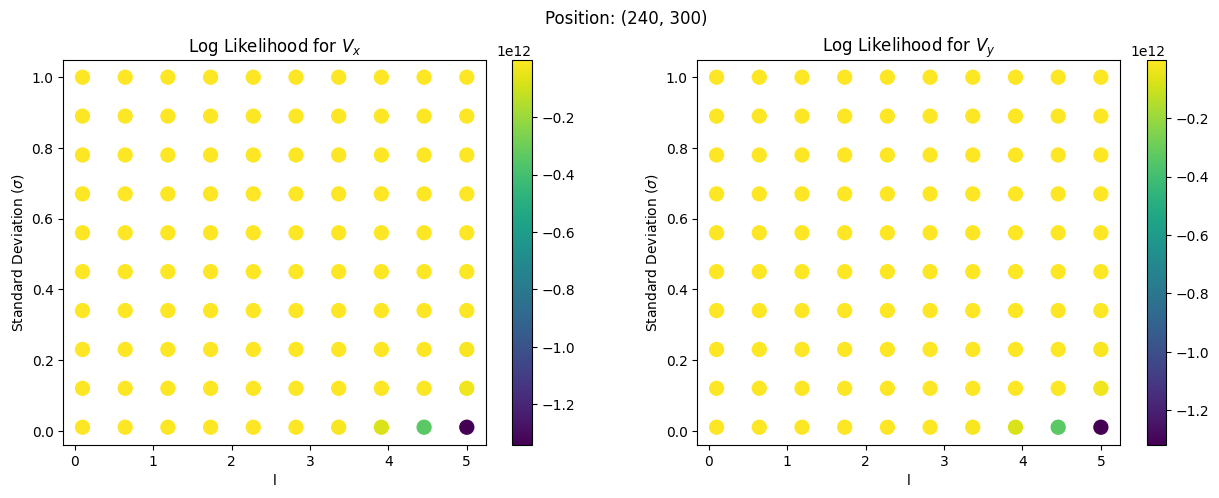

100%|██████████| 100/100 [00:06<00:00, 15.46it/s]


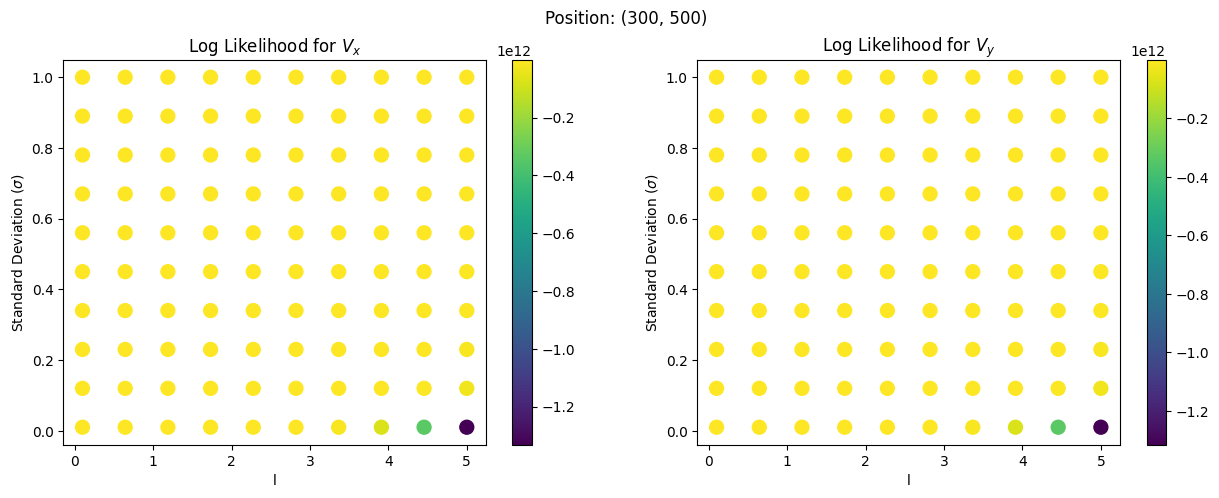

In [5]:
# Different positions to test for the prediction
positions = np.array([
    [200, 400],
    [240, 300],
    [300, 500],
])

# Create a range of values for "l" and "sigma"
l_range = np.linspace(0.1, 5, 10)
std_range = np.linspace(0.01, 1, 10)

for position in positions:

    # Get the velocity data for the selected location
    x = position[0]
    y = position[1]
    V_loc = Vt[:, y, x, :]

    # Get the X and Y velocity components
    Vx_loc = V_loc[:, 0]
    Vy_loc = V_loc[:, 1]

    # Number of folds to use for cross validation
    num_folds = 15

    # Optimize the kernel parameters for the X component
    l_x, std_x, x_results_df = optimize_kernel_params(
        data=Vx_loc,
        l_range=l_range,
        std_range=std_range,
        num_folds=num_folds
    )

    # Optimize the kernel parameters for the Y component
    l_y, std_y, y_results_df = optimize_kernel_params(
        data=Vy_loc,
        l_range=l_range,
        std_range=std_range,
        num_folds=num_folds
    )

    # Plot the results of the grid search
    plot_grid_search_results(
        x_results_df=x_results_df,
        y_results_df=y_results_df,
        position=position
    )

#### Problem 4.c (5 points)


  0%|          | 0/100 [00:00<?, ?it/s]e:\Archivos\Educación\Posgrado\Data Science (Universidad Galileo)\2022 (MITx)\Data Analysis - Statistical Modelling and Computation\Module 5 - Environmental Data and Gaussian Processes\Project\gaussian_process.py:266: RuntimeWarning: divide by zero encountered in log
  term_1 = -np.log((2 * np.pi)**((N_minus_d / k)/2) *
  0%|          | 0/100 [00:00<?, ?it/s]e:\Archivos\Educación\Posgrado\Data Science (Universidad Galileo)\2022 (MITx)\Data Analysis - Statistical Modelling and Computation\Module 5 - Environmental Data and Gaussian Processes\Project\gaussian_process.py:266: RuntimeWarning: divide by zero encountered in log
  term_1 = -np.log((2 * np.pi)**((N_minus_d / k)/2) *
100%|██████████| 100/100 [00:04<00:00, 23.88it/s]


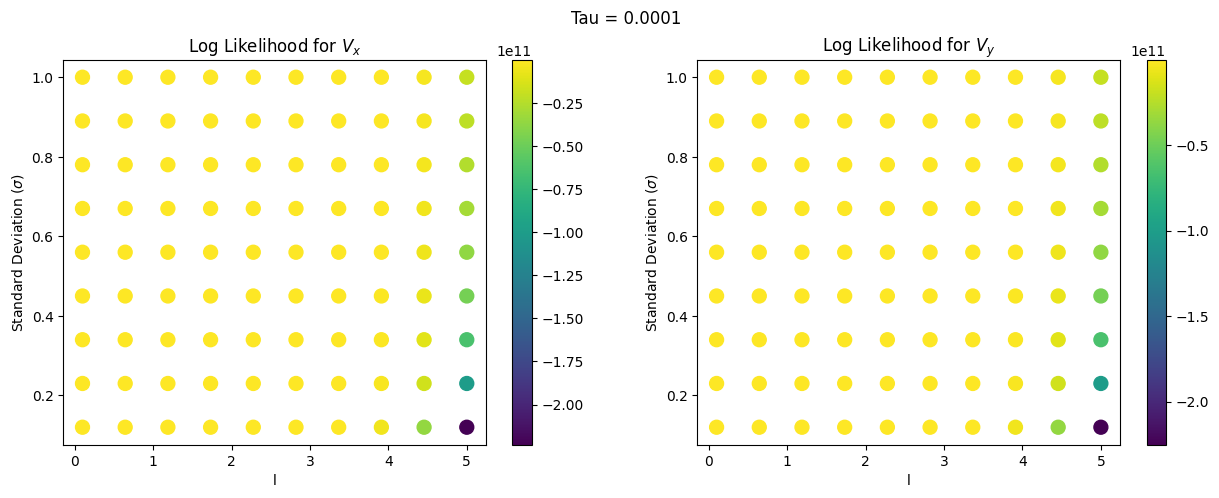

100%|██████████| 100/100 [00:03<00:00, 28.44it/s]


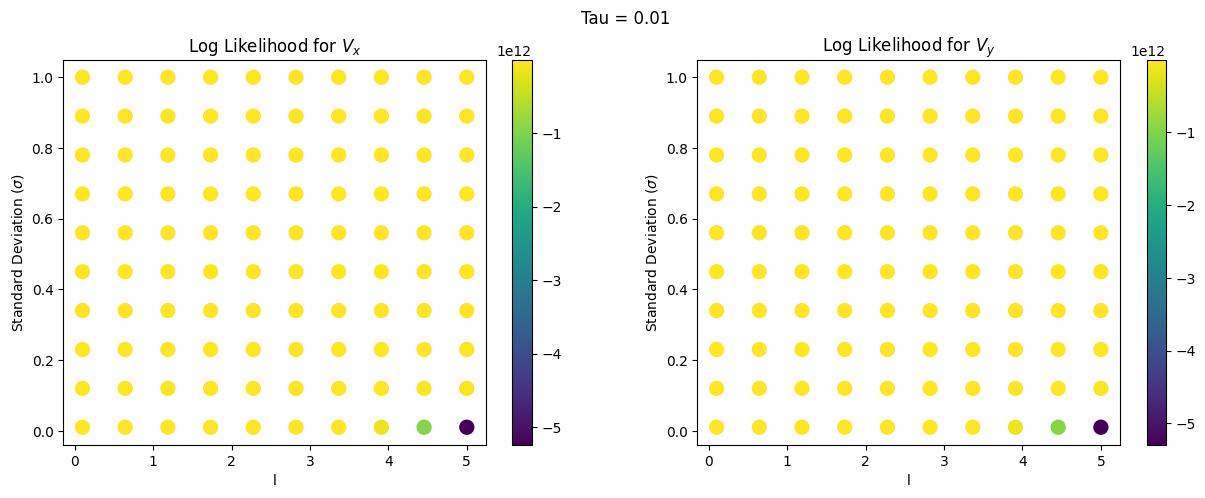

100%|██████████| 100/100 [00:03<00:00, 26.38it/s]


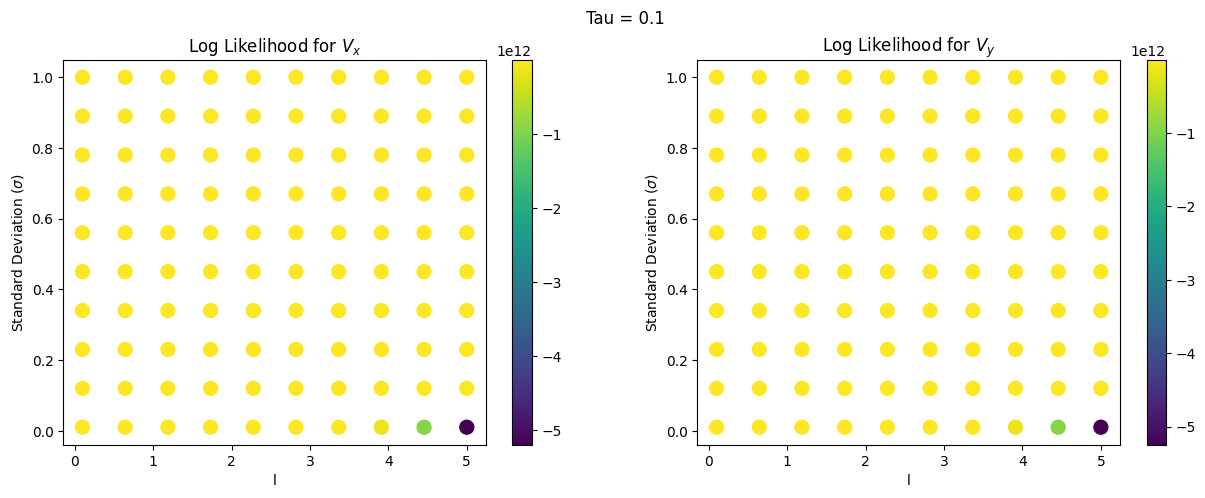

100%|██████████| 100/100 [00:03<00:00, 26.93it/s]


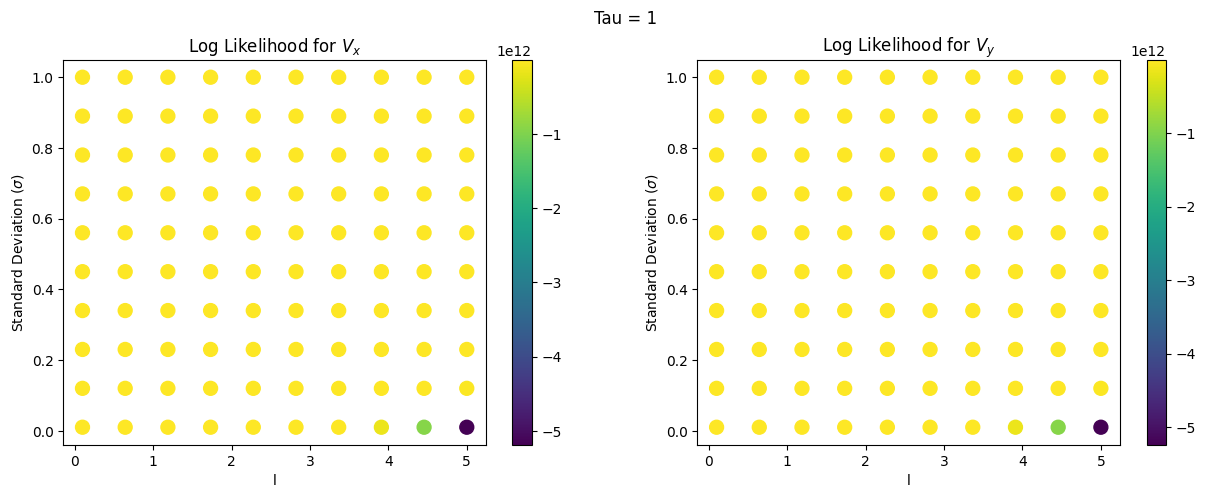

In [6]:
# Values of Tau to test
tau_values = [0.0001, 0.01, 0.1, 1]

# Create a range of values for "l" and "sigma"
l_range = np.linspace(0.1, 5, 10)
std_range = np.linspace(0.01, 1, 10)

# Use a fixed location for all tests
position = np.array([200, 400])
Vx_loc = Vt[:, position[1], position[0], 0]
Vy_loc = Vt[:, position[1], position[0], 1]

for tau in tau_values:

    # Optimize the kernel parameters for the X component
    l_x, std_x, x_results_df = optimize_kernel_params(
        data=Vx_loc,
        l_range=l_range,
        std_range=std_range,
        tau=tau
    )

    # Optimize the kernel parameters for the Y component
    l_y, std_y, y_results_df = optimize_kernel_params(
        data=Vy_loc,
        l_range=l_range,
        std_range=std_range,
        tau=tau
    )

    # Plot the results of the grid search
    plot_grid_search_results(
        x_results_df=x_results_df,
        y_results_df=y_results_df,
        position=position,
        custom_title_text=f'Tau = {tau}'
    )


#### Problem 4.d (10 points)


In [7]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C
from sklearn.model_selection import train_test_split

# Use a fixed location for all tests
position = np.array([200, 400])
Vx_loc = Vt[:, position[1], position[0], 0]
Vy_loc = Vt[:, position[1], position[0], 1]

# Get the "Xs" and "Ys" for the Gaussian Process
y_x = Vx_loc
y_y = Vy_loc
X = np.arange(0, len(y_x)).reshape(-1, 1)

# Split the data into training and testing sets
# (There's no need for re-defining X because it's the same for both components)
X_train, X_test, y_x_train, y_x_test = train_test_split(
    X, y_x, test_size=0.2, random_state=42
)
_, _, y_y_train, y_y_test = train_test_split(
    X, y_y, test_size=0.2, random_state=42
)

# Fit the Gaussian Process to the training data
gpr_fit = GaussianProcessRegressor().fit(X_train, y_x_train)
params_x = gpr_fit.kernel_.get_params()
score_x = gpr_fit.score(X_test, y_x_test)
print("X - Kernel parameters: ", params_x)
print("X - Score: ", score_x)

gpr_fit = GaussianProcessRegressor().fit(X_train, y_y_train)
params_y = gpr_fit.kernel_.get_params()
score_y = gpr_fit.score(X_test, y_y_test)
print("Y - Kernel parameters: ", params_y)
print("Y - Score: ", score_y)

X - Kernel parameters:  {'k1': 1**2, 'k2': RBF(length_scale=1), 'k1__constant_value': 1.0, 'k1__constant_value_bounds': 'fixed', 'k2__length_scale': 1.0, 'k2__length_scale_bounds': 'fixed'}
X - Score:  0.7553470863991802
Y - Kernel parameters:  {'k1': 1**2, 'k2': RBF(length_scale=1), 'k1__constant_value': 1.0, 'k1__constant_value_bounds': 'fixed', 'k2__length_scale': 1.0, 'k2__length_scale_bounds': 'fixed'}
Y - Score:  0.905872052402762


#### Problem 5 (15 points)

ALERTA: Posible razón por la que no está funcionando tan bien. La matriz de distancias en la rutina del kernel está mal. Creo que ahorita genera un nuevo vector que va de 0 a 100, pero ahorita estamos tratando de hacer interpolación, entonces no se deberían de usar esos nuevos valores como de indices, sino los valores de X como tal. Epsero que así sea, sino tocará ver y probar otra cosa.


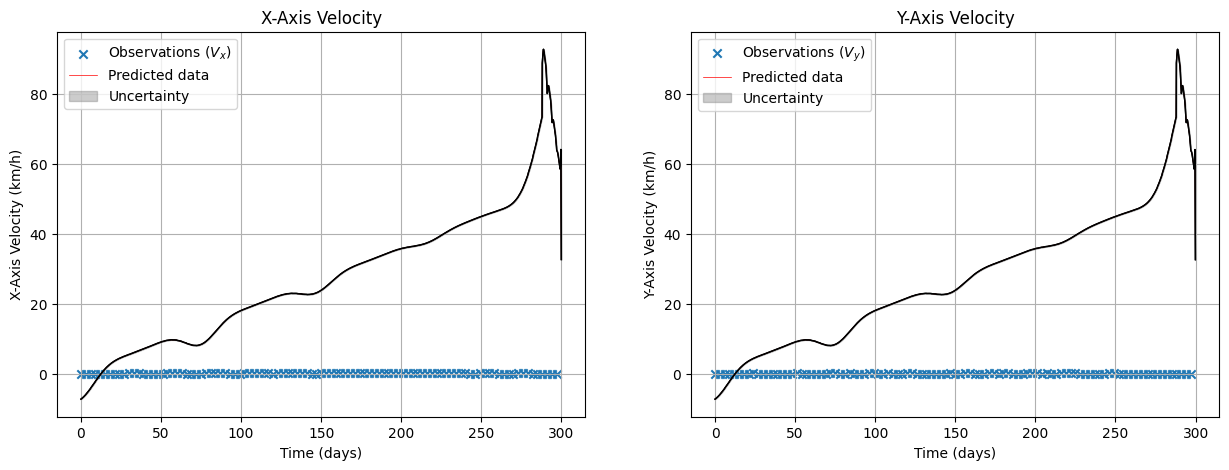

In [34]:
# Select the velocity data for the location selected in 4.a
x = 200
y = 400
Vx_loc = Vt[:, y, x, 0]
Vy_loc = Vt[:, y, x, 1]

# Currently we have measurements for every 3 days. We previously assumed that
# ocean currents remain constant for about 3 hours, therefore, we can predict
# the velocity at smaller time intervals by having 24 measurements in between
# each of the original measurements (i.e. 24 * 3 = 72 hours = 3 days).
X_pred = np.arange(0, Vx_loc.shape[0], 1/24)

# Get the full range of values for X
# (For the Philippines dataset, this is just the X axis of the data, or
# a range from 0 to the number of timesteps)
X = np.arange(Vx_loc.shape[0])

# ================= PREDICTIONS ================ #

# Calculate the conditional mean and variance of the X component
conditional_mean_x, conditional_variance_x, _ = predict_conditional_mean_and_var(
    x1=X_pred,
    x2=X,
    y2=Vx_loc,
    kernel_args=(optimal_l_x, optimal_std_x)
)

# Calculate the conditional mean and variance of the Y component
conditional_mean_y, conditional_variance_y, _ = predict_conditional_mean_and_var(
    x1=X_pred,
    x2=X,
    y2=Vy_loc,
    kernel_args=(optimal_l_y, optimal_std_y)
)

# Extract the variance along the diagonal
var_x = np.sqrt(np.diagonal(conditional_variance_x))
var_y = np.sqrt(np.diagonal(conditional_variance_y))

# ============== PLOT X COMPONENT ============== #

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Convert the "X" values to days by multiplying by 3
t_days = X * 3

# Convert the "X_pred" values to days by multiplying by 3
t_pred_days = X_pred * 3

# Plot the results
ax1.scatter(
    t_days,
    Vx_loc,
    label='Observations ($V_x$)',
    marker='x',
)
ax1.plot(
    t_pred_days,
    conditional_mean_x,
    label='Predicted data',
    color='red',
    linewidth=0.5
)
ax1.plot(
    t_pred_days,
    conditional_mean_x + 3*var_x,
    color="black",
    linewidth=1
)
ax1.plot(
    t_pred_days,
    conditional_mean_x - 3*var_x,
    color="black",
    linewidth=1
)
ax1.fill_between(
    t_pred_days,
    conditional_mean_x + 3*var_x,
    conditional_mean_x - 3*var_x,
    label="Uncertainty",
    color="gray",
    alpha=0.4
)

ax1.legend()
ax1.grid()
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('X-Axis Velocity (km/h)')
ax1.set_title('X-Axis Velocity')

# ============== PLOT Y COMPONENT ============== #

ax2.scatter(
    t_days,
    Vy_loc,
    label='Observations ($V_y$)',
    marker='x',
)
ax2.plot(
    t_pred_days,
    conditional_mean_y,
    label='Predicted data',
    color='red',
    linewidth=0.5
)
ax2.plot(
    t_pred_days,
    conditional_mean_y + 3*var_y,
    color="black",
    linewidth=1
)
ax2.plot(
    t_pred_days,
    conditional_mean_y - 3*var_y,
    color="black",
    linewidth=1
)
ax2.fill_between(
    t_pred_days,
    conditional_mean_y + 3*var_y,
    conditional_mean_y - 3*var_y,
    label="Uncertainty",
    color="gray",
    alpha=0.4
)

ax2.legend()
ax2.grid()
ax2.set_xlabel('Time (days)')
ax2.set_ylabel('Y-Axis Velocity (km/h)')
ax2.set_title('Y-Axis Velocity')

plt.show()